In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

import sys
sys.path.append("../../")
import src.SupportOutliers as outliers

from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_pickle("../../datos/04_datos_feature_scaled.plk")

# Gestión de los Outliers
- Vamos a ver los outliers 
    - Univariados
    - Multivariados
- Los analizaremos con IsoForest

### Visualizar 

### Univariados
- Recordamos que:
    - 0: No
    - 1: Yes

In [3]:
cols_outliers = ["BusinessTravel", "Department", "DistanceFromHome", "EducationField", "JobRole", "MaritalStatus", "NumCompaniesWorked", "TrainingTimesLastYear", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement","Attrition"]

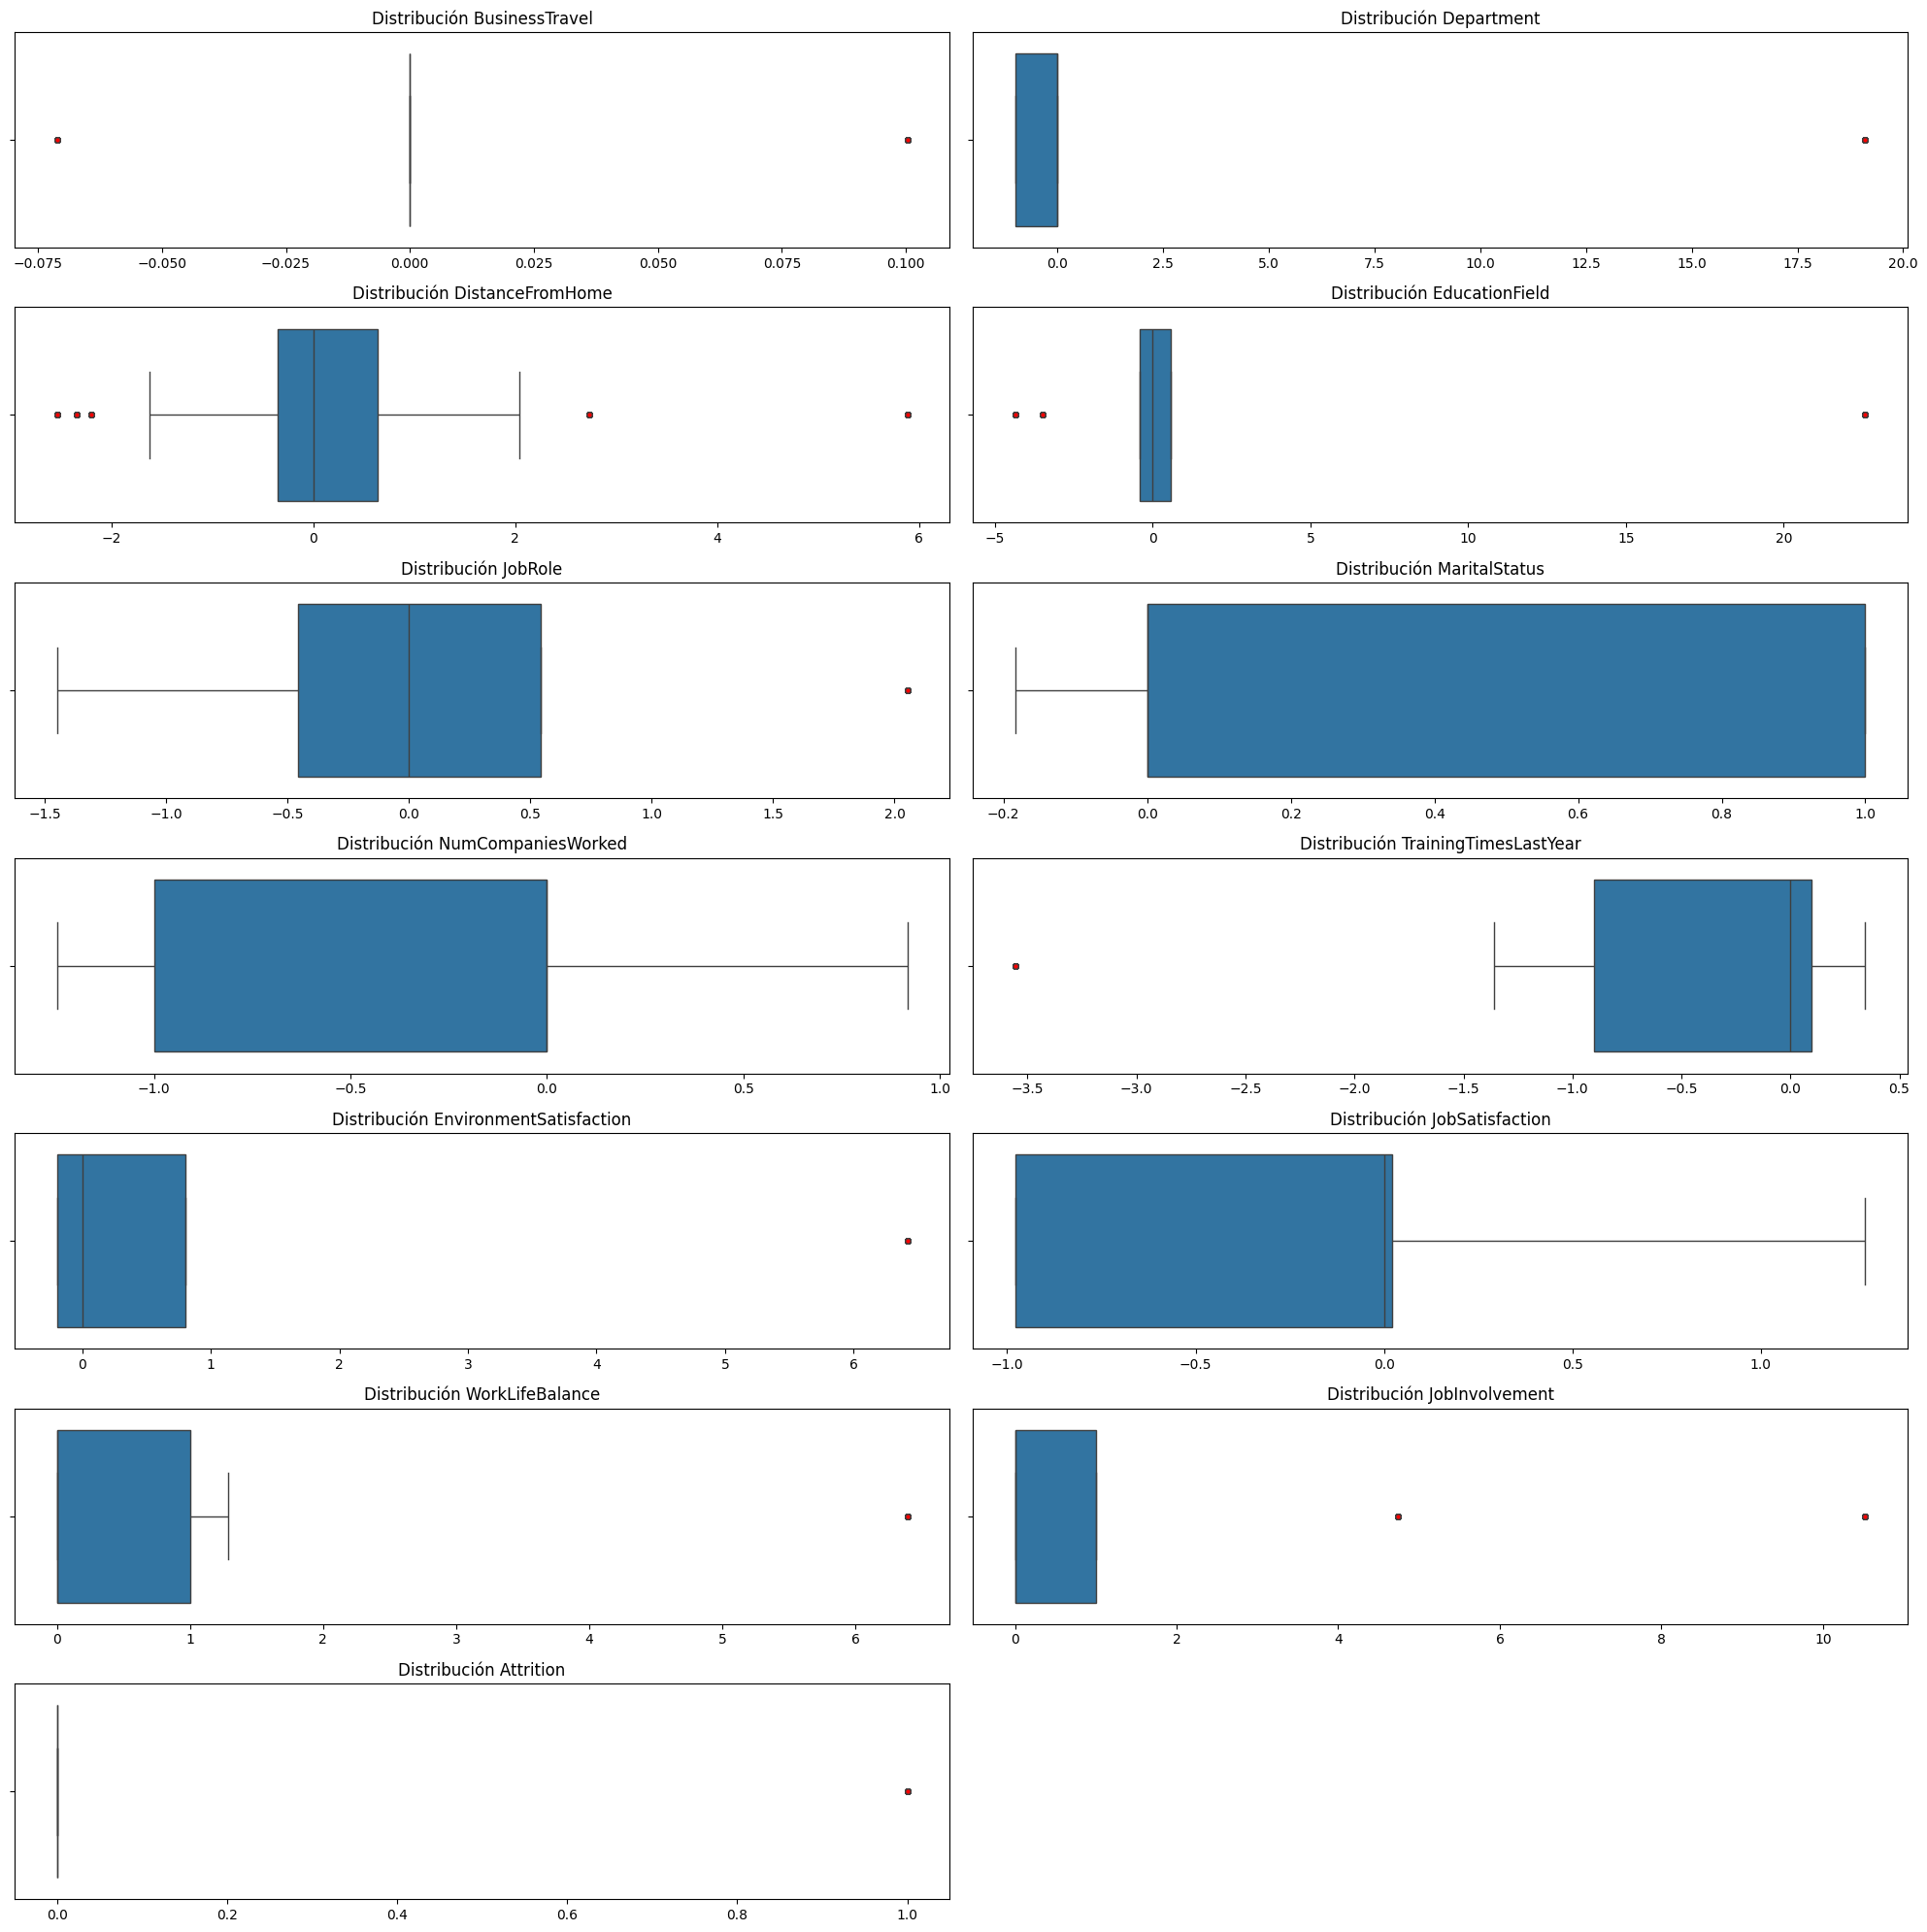

In [4]:
outliers.plot_outliers_univariados(df[cols_outliers],"b",grafica_size=(20,20))

### Bivariados
- Recordamos que:
    - 0: No
    - 1: Yes

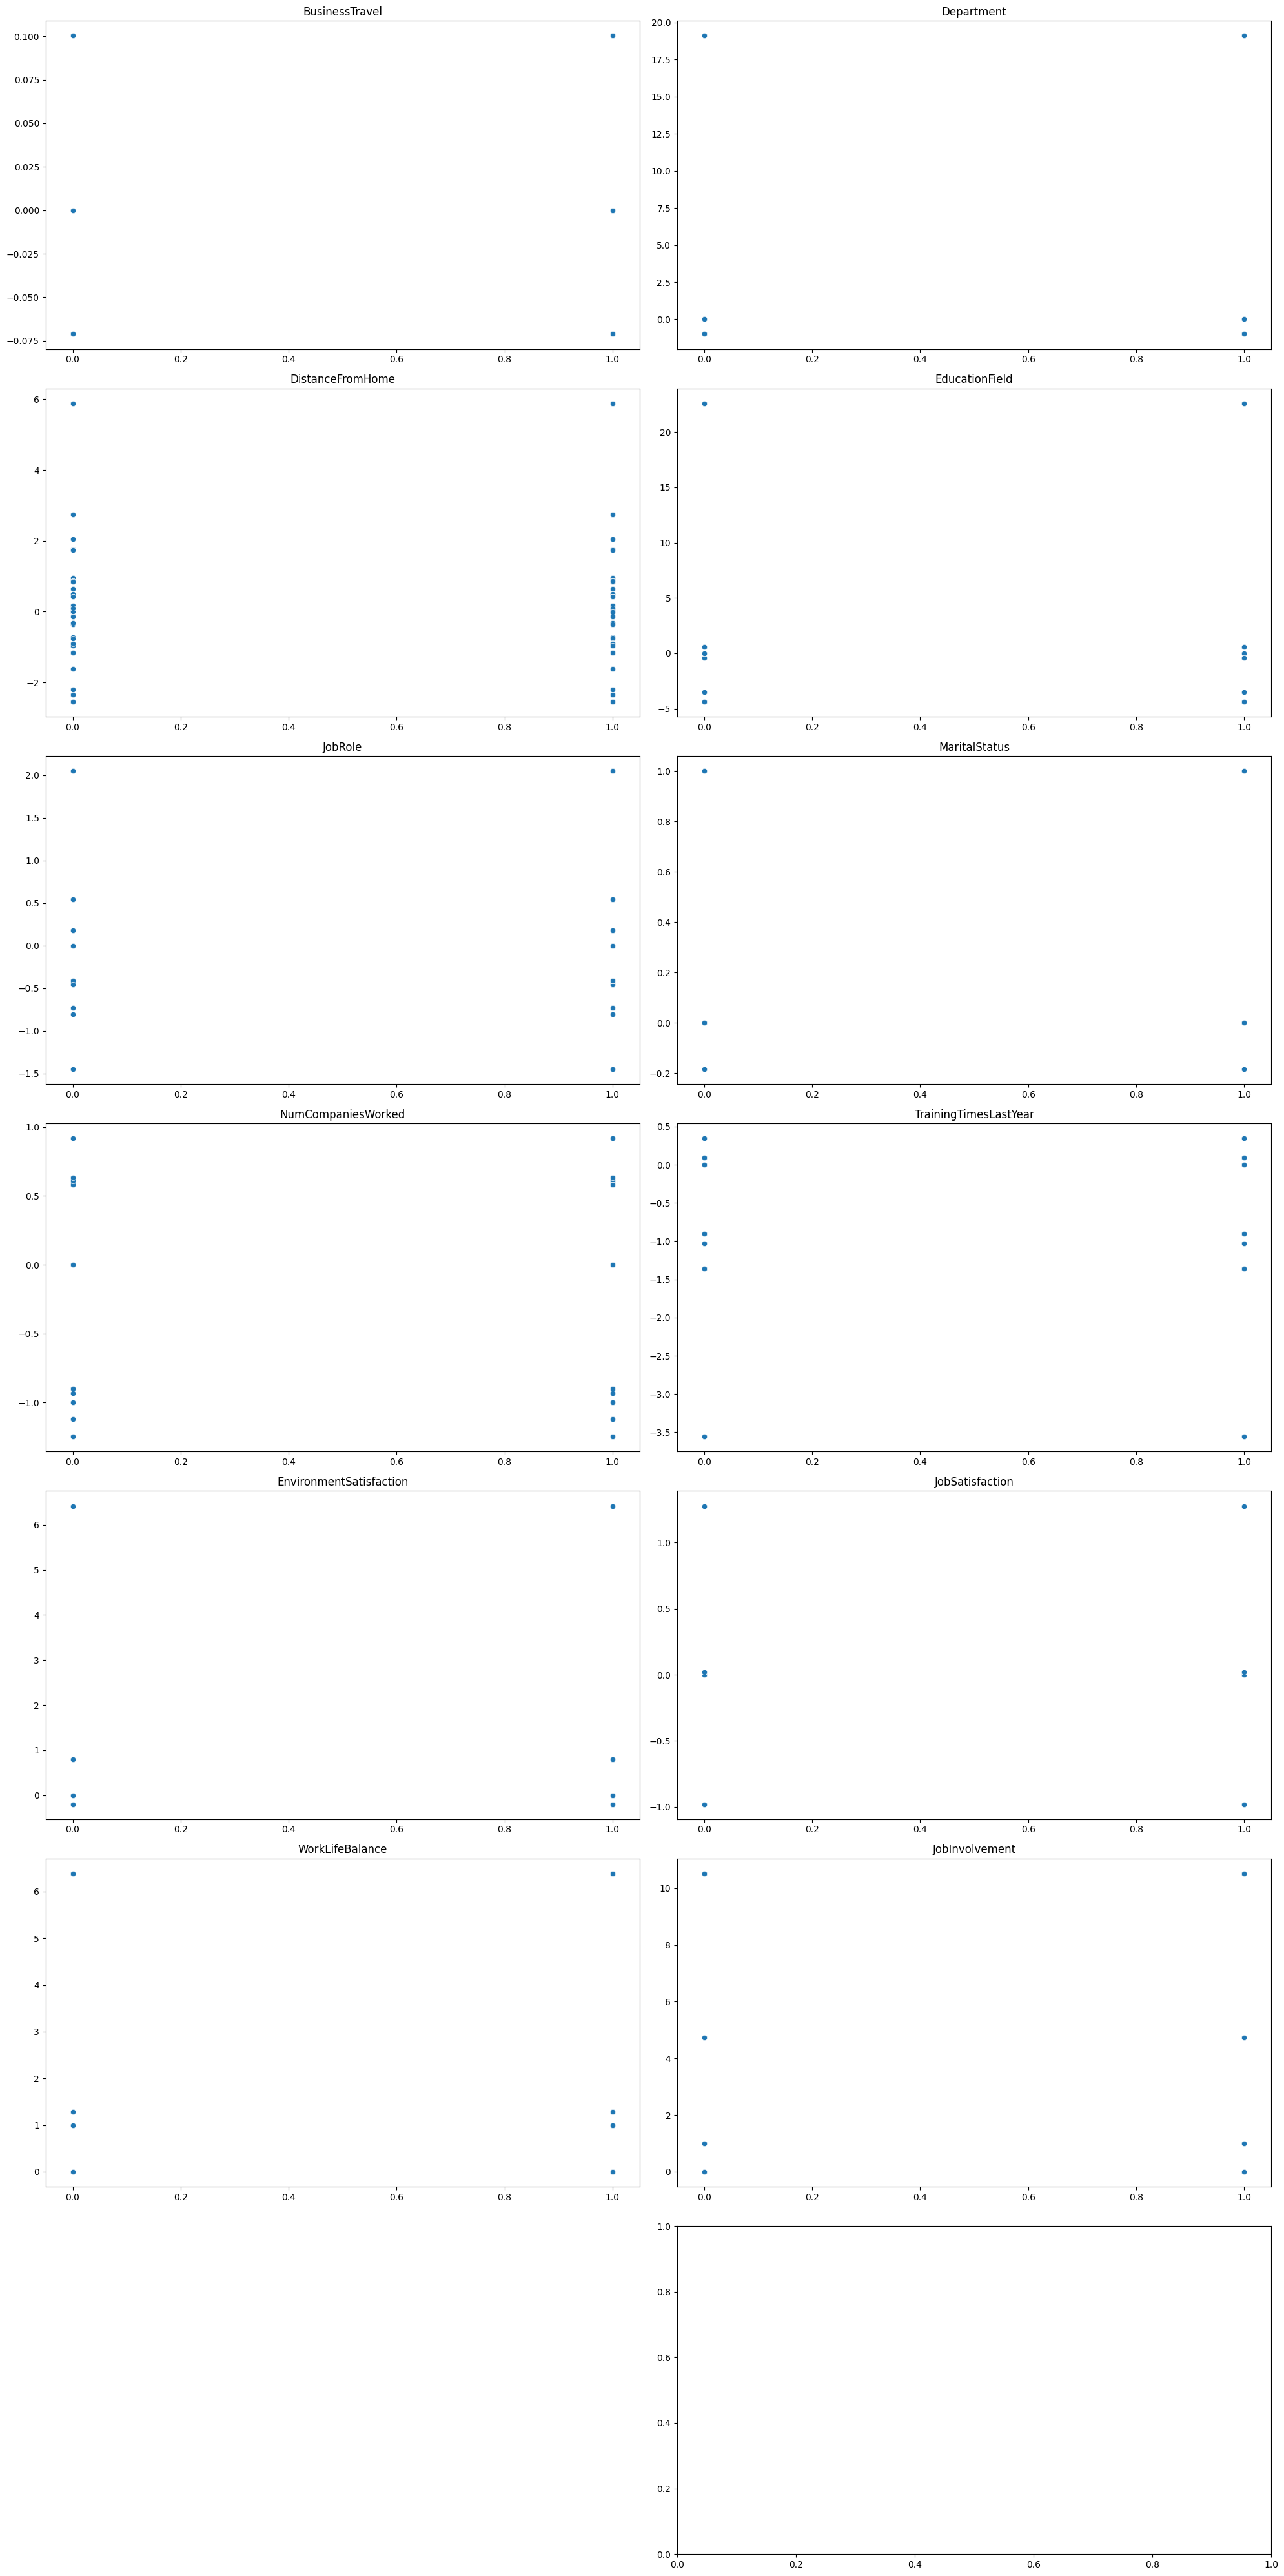

In [5]:
outliers.visualizar_outliers_bivariados(df[cols_outliers],"Attrition",tamano_grafica=(20,40))

### Analizar outliers mediante ISO Forest

se ha hecho outlier_0.01_Attrition_isoforest
se ha hecho outlier_0.05_Attrition_isoforest
se ha hecho outlier_0.1_Attrition_isoforest
Se devuelve df Modificado


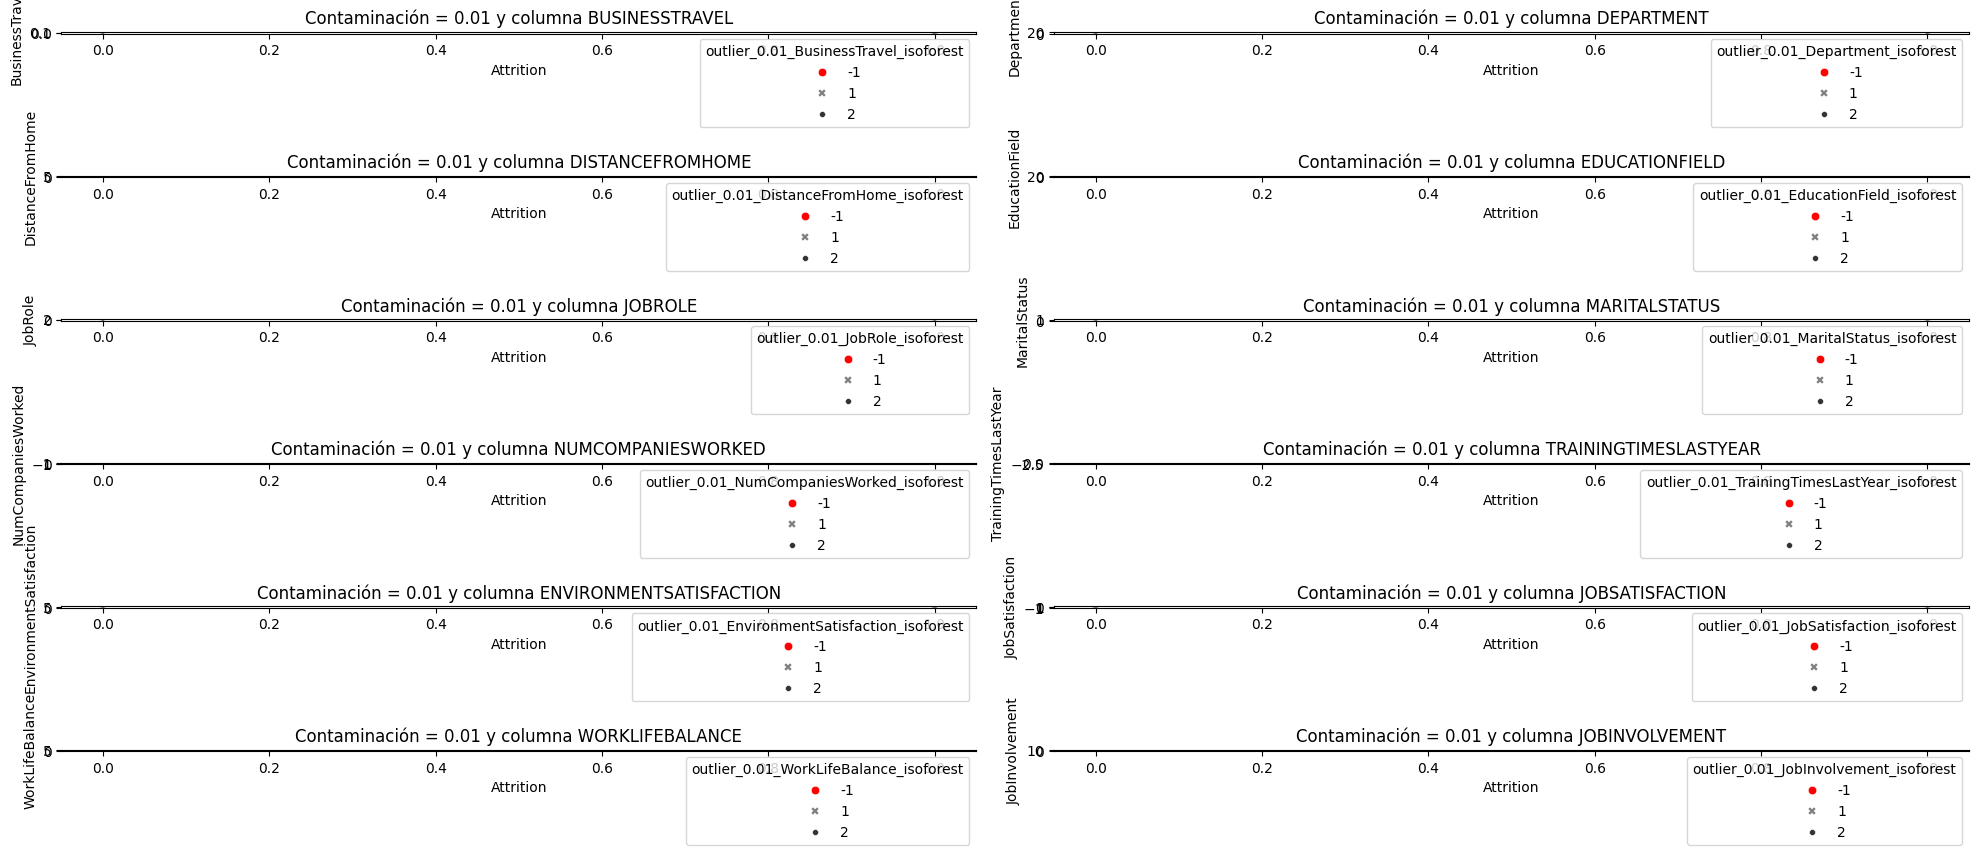

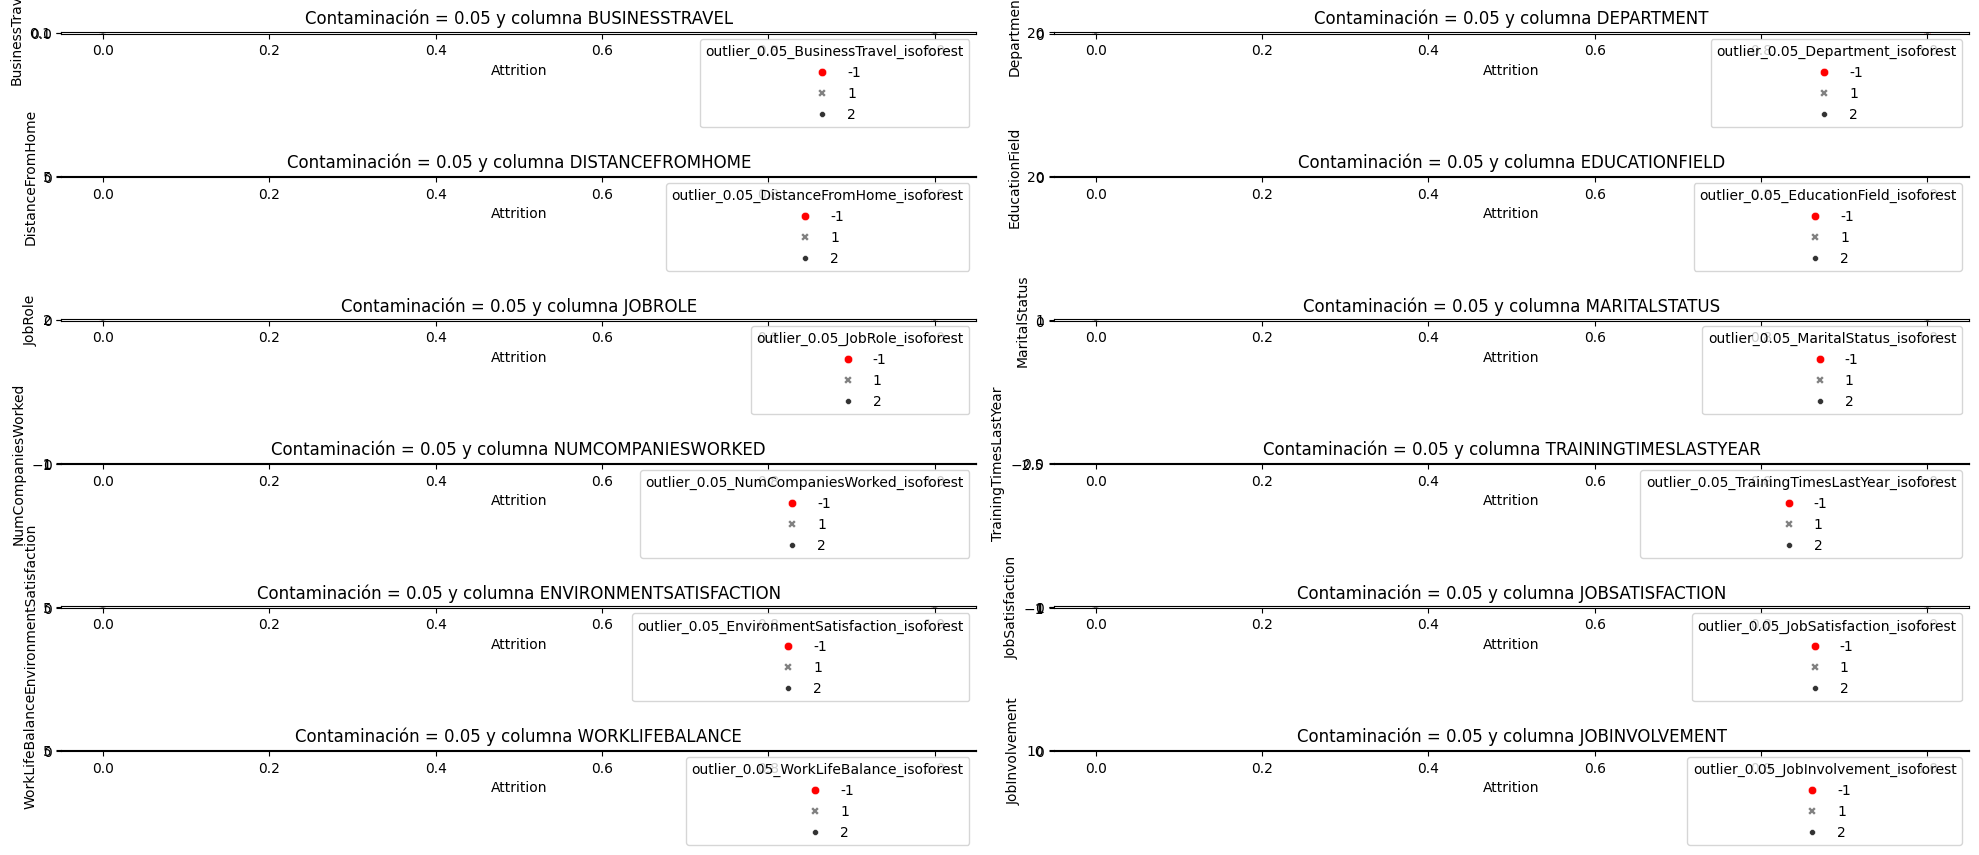

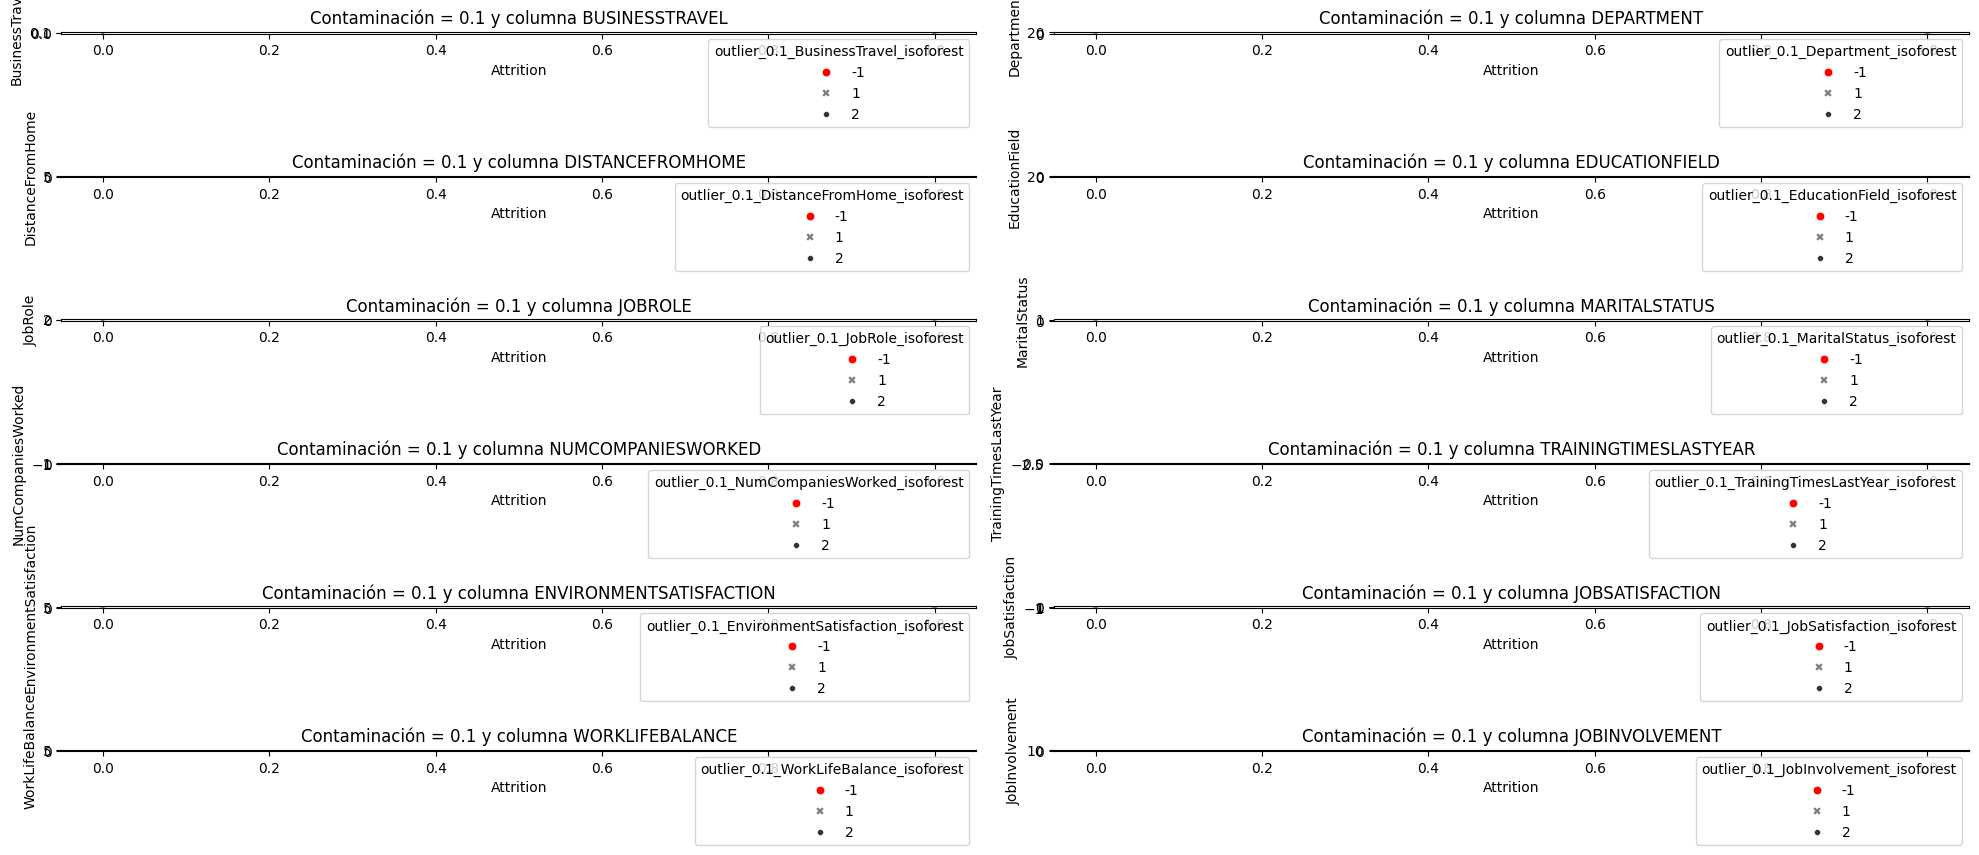

In [6]:
df_iso = outliers.explorar_outliers_if(df[cols_outliers],df,"Attrition",grafica_size=(20,10))

In [7]:
df_iso.sample()

,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,NumCompaniesWorked,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,...,outlier_0.1_EducationField_isoforest,outlier_0.1_JobRole_isoforest,outlier_0.1_MaritalStatus_isoforest,outlier_0.1_NumCompaniesWorked_isoforest,outlier_0.1_TrainingTimesLastYear_isoforest,outlier_0.1_EnvironmentSatisfaction_isoforest,outlier_0.1_JobSatisfaction_isoforest,outlier_0.1_WorkLifeBalance_isoforest,outlier_0.1_JobInvolvement_isoforest,outlier_0.1_Attrition_isoforest
1585,0.100265,-1.0,1.730484,-0.422422,-0.414096,-0.184048,-1.117518,0.343751,6.418159,0.020894,...,1,1,1,1,1,1,1,1,1,1


# Categorizamos los outliers
### Vamos a gestionar los outliers, los vamos a clasificar como
- "No es Outlier": Todas las columnas del LOF son 1
- "Improbable Outlier": El 60% de las columnas son 1
- "Es probable que sea Outlier": El 60% de las columnas son -1
- "Outlier Total": El 100% de las columnas son -1

In [8]:
len(df_iso.filter(like="outlier_").columns)

39

In [9]:
# Generamos nueva columna
df_iso["tipo_outliers"] = 0

# Contamos cuantos -1 hay
for columna in df_iso.filter(like="outlier").columns:
    df_iso["tipo_outliers"] += (df_iso[columna] == -1).astype(int)

# Generamos el diccionario de condiciones y textos para reemplazar
condiciones = [
    df_iso["tipo_outliers"] == 0,
    df_iso["tipo_outliers"].between(1, 24,"both"),
    df_iso["tipo_outliers"].between(25, 35,"both"),
    df_iso["tipo_outliers"] == 36
]

textos = [
    "No es Outlier",
    "Improbable Outlier",
    "Probable Outlier",
    "Total Outlier"
]

# Reemplazamos la cuenta por el texto
df_iso["tipo_outliers"] = np.select(condiciones, textos, default="Unknown")

In [10]:
df_iso.drop(columns=df_iso.filter(like="outlier_").columns,inplace=True)

In [11]:
df_iso["tipo_outliers"].value_counts().reset_index()

,tipo_outliers,count
0,No es Outlier,3890
1,Improbable Outlier,215
2,Probable Outlier,175
3,Unknown,42


In [12]:
df_iso.sample()

,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,NumCompaniesWorked,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,...,PercentSalaryHike_21 %,PercentSalaryHike_22 %,PercentSalaryHike_23 %,PercentSalaryHike_24 %,PercentSalaryHike_25 %,StockOptionLevel_Level 0,StockOptionLevel_Level 1,StockOptionLevel_Level 2,StockOptionLevel_Level 3,tipo_outliers
3018,0.100265,0.0,-2.542303,-4.366886,0.180511,-0.184048,0.0,-0.90294,0.802046,0.020894,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Improbable Outlier


# Gestión de Outliers
- En este Modelo no se gestionan outliers

# Dropeamos tipo_outliers

In [13]:
df_iso.drop(columns=("tipo_outliers"),inplace=True)

# Guardamos

In [14]:
df_iso.to_pickle("../../datos/05_datos_outliers_gestionado.plk")